<a href="https://colab.research.google.com/github/temple17/self-review/blob/main/California_housing_price_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Step1.Import

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import seaborn as sns
import plotly.express as px

import os
import tarfile
import urllib.request


# Step2. Download the dataset

In [2]:
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

In [3]:
def fetch_housing_data(housing_url = HOUSING_URL, housing_path = HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path = housing_path)
    housing_tgz.close()

In [4]:
fetch_housing_data()

In [5]:
def load_housing_data(housing_path = HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

In [6]:
housing = load_housing_data()


# Step3.EDA


## 3-1. info, describe

In [7]:
housing.info()
# 207 null values in total_bedrooms

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [8]:
housing.describe()

longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20640.000000  20640.000000   20640.000000   
mean       537.870553   1425.476744    499.539680       3.870671   
std        421.385070   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.499900   
25%        296.000000    787.000000    280.000000       2.563400   
50%        435.000000   1166.000000    409.000000       3.534800   
75%        647.000000   1725.000000    605.000000       4.743250   
max       6445.000000  35682.000000   6082.000000      15.000100   

       median_house_value  
count        20640.000000  
mean        206855.816909  
std         115395.615874  
min          14999.000000  
25%         119600.000000  
50%         179700.000000  
75%         264725.000000  
max         500001.000000

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f15e0c4da50>,
      dtype=object)

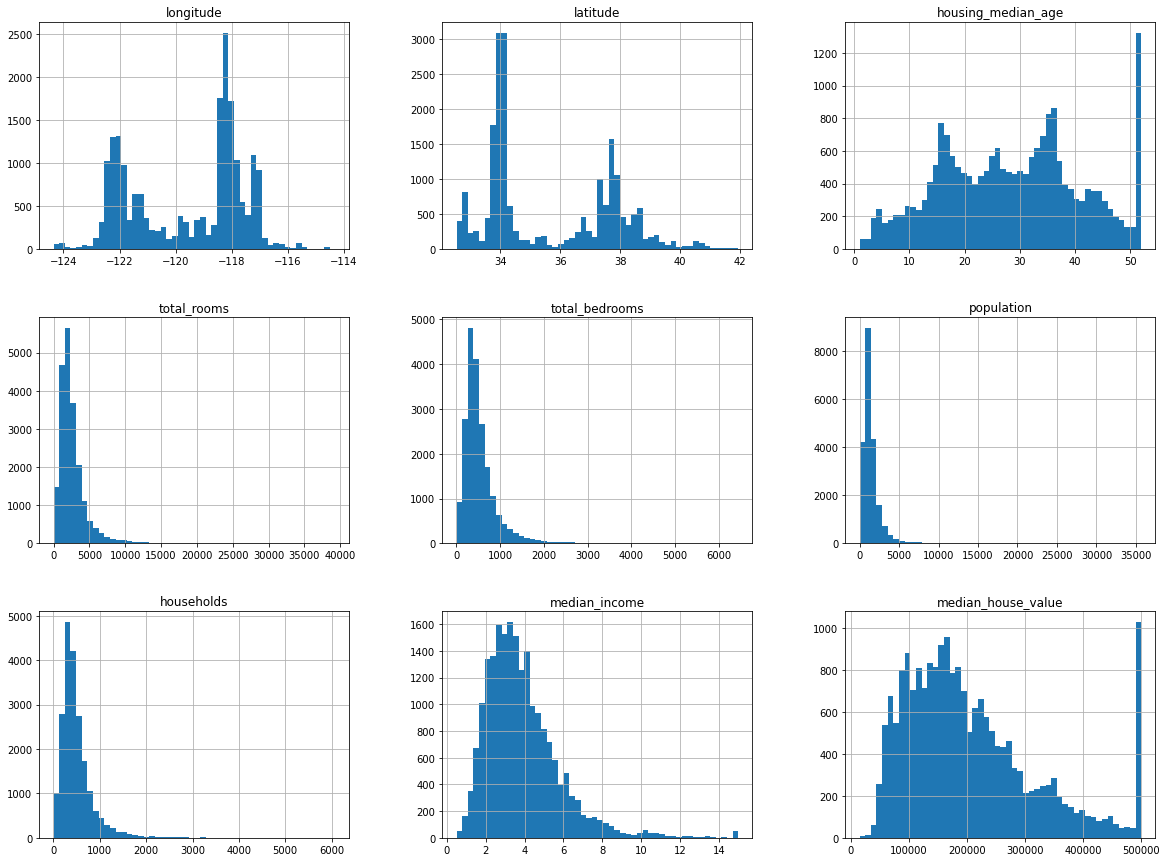

In [9]:
housing.hist(bins = 50, figsize = (20, 15))

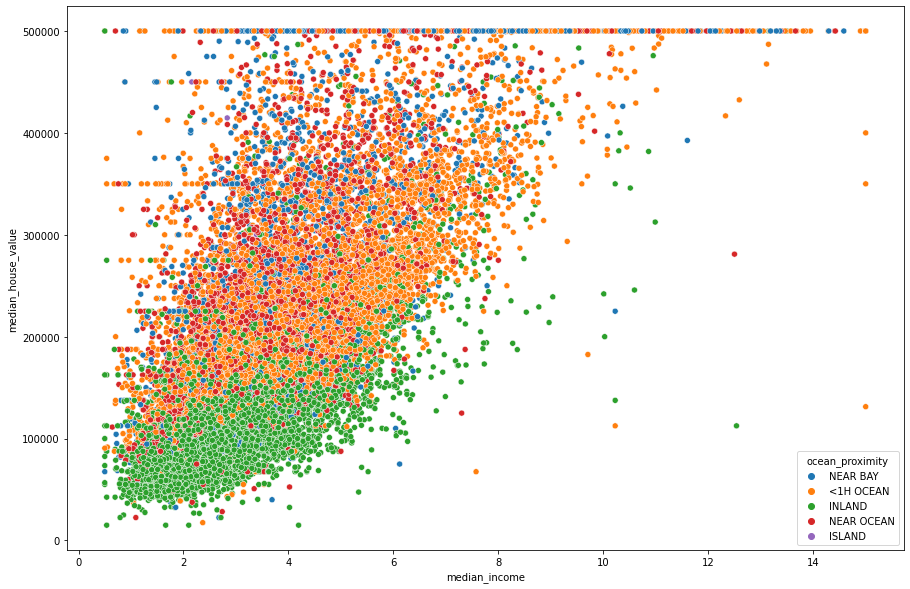

In [10]:
plt.figure(figsize = (15,10))
sns.scatterplot(data = housing, x = 'median_income', y = 'median_house_value', hue = 'ocean_proximity')

In [11]:
housing['value_range'] = pd.cut(housing['median_house_value'], 5, labels = ['1','2','3','4','5'])

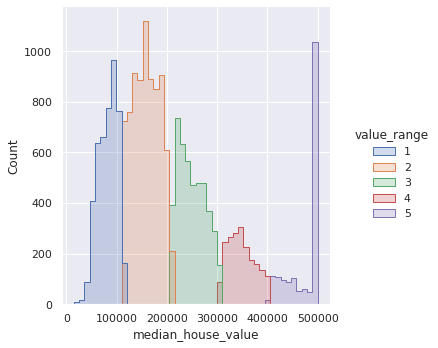

In [12]:
sns.set(rc = {'figure.figsize':(15,10)})
sns.displot(housing, x = 'median_house_value', hue = 'value_range', element = 'step')

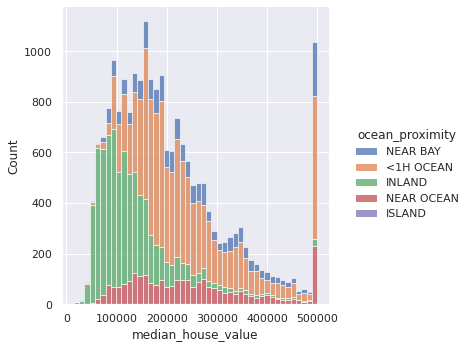

In [13]:
sns.set(rc={'figure.figsize':(20, 15)})
sns.displot(housing, x = 'median_house_value', hue = 'ocean_proximity', multiple = 'stack')

In [14]:
housing.groupby(['ocean_proximity']).size()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
ISLAND           5
NEAR BAY      2290
NEAR OCEAN    2658
dtype: int64

## 3.2 Null values

In [15]:
housing.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
value_range             0
dtype: int64

In [16]:
housing['total_bedrooms'] = housing['total_bedrooms'].fillna(housing['total_bedrooms']).median()

In [18]:
housing.corr()['median_house_value'].sort_values()

latitude             -0.144160
longitude            -0.045967
population           -0.024650
households            0.065843
housing_median_age    0.105623
total_rooms           0.134153
median_income         0.688075
median_house_value    1.000000
total_bedrooms             NaN
Name: median_house_value, dtype: float64

## 3.3 Detect Outliers

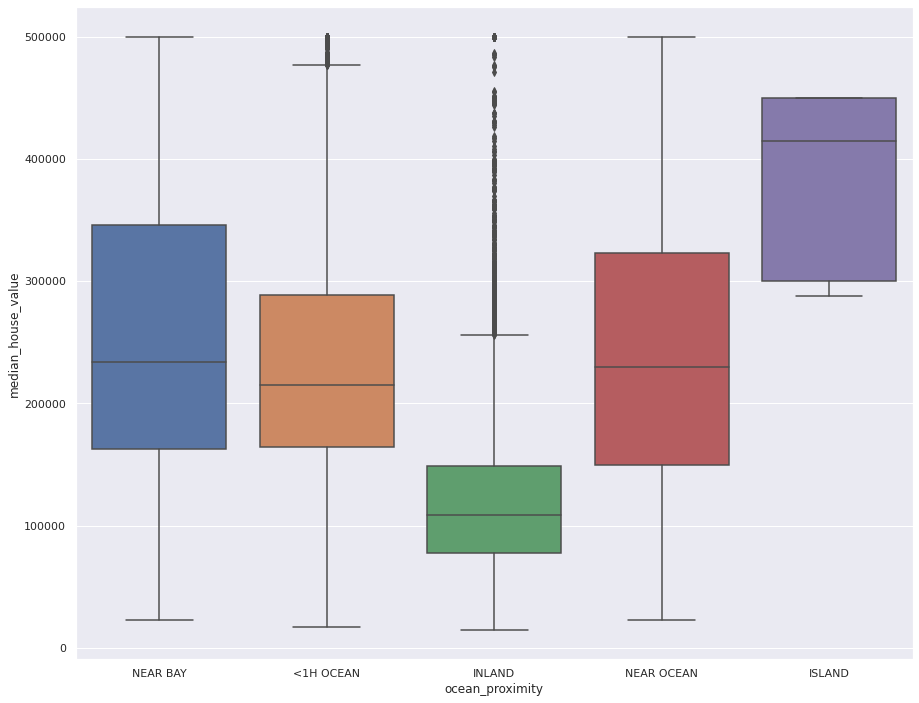

In [19]:
plt.figure(figsize = (15,12))
sns.boxplot(data = housing, x = 'ocean_proximity', y = 'median_house_value')